In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_excel('../../data/raw_data.xlsx')

In [3]:
raw_data.head()

,REGISTRATION,BRANCH,AREA,NAME,GENDER,ETHNICITY,JOB_TITLE,SALARY,CONTRACT_TYPE,EDUCATION,PWD,CONTRACT_TIME,AGE_RANGE,CONTRACT_REGIME
0,10881,Branch_4,Area_91,Joan Evans,M,HISPANIC,Driver Mid.,2271,Indefinite-Term,High School,0,< 1 Contract Year,30 - 35 Years,Monthly Contract
1,10448,Branch_4,Area_91,Rose Brown,M,BLACK,Maintenance Assistant,2302,Definite-Term,High School,0,< 1 Contract Year,50 - 55 Years,Monthly Contract
2,10399,Branch_4,Area_91,Jessica Sanders,M,HISPANIC,Maintenance Assistant,2399,Definite-Term,High School,0,< 1 Contract Year,30 - 35 Years,Monthly Contract
3,10401,Branch_4,Area_91,Ethan Clark,M,BLACK,Maintenance Assistant,2302,Definite-Term,High School,0,< 1 Contract Year,25 - 30 Years,Monthly Contract
4,10469,Branch_4,Area_91,Jesse Reed,M,HISPANIC,Maintenance Technician Jr.,2474,Indefinite-Term,High School,0,< 1 Contract Year,50 - 55 Years,Monthly Contract


In [5]:
# Describe the numeric variables
raw_data['SALARY'].describe()

count     1862.000000
mean      7676.168636
std       6739.893225
min         37.000000
25%       3038.000000
50%       5810.500000
75%      10798.000000
max      72579.000000
Name: SALARY, dtype: float64

In [10]:
raw_data.dtypes

REGISTRATION        int64
BRANCH             object
AREA               object
NAME               object
GENDER             object
ETHNICITY          object
JOB_TITLE          object
SALARY              int64
CONTRACT_TYPE      object
EDUCATION          object
PWD                 int64
CONTRACT_TIME      object
AGE_RANGE          object
CONTRACT_REGIME    object
dtype: object

In [39]:
raw_data['REGISTRATION'] = raw_data['REGISTRATION'].astype(str)

In [56]:
categorical_variables = ['GENDER','ETHNICITY','JOB_TITLE','CONTRACT_TYPE','EDUCATION','PWD','CONTRACT_TIME','AGE_RANGE','CONTRACT_REGIME']

In [45]:
raw_data[['REGISTRATION','GENDER']].groupby('GENDER').count().reset_index()

,GENDER,REGISTRATION
0,F,653
1,M,1209


In [60]:
raw_data[['REGISTRATION','JOB_TITLE']].groupby('JOB_TITLE').count().reset_index()

,JOB_TITLE,REGISTRATION
0,Academic Leader,3
1,Academic Secretary Assistant,1
2,Academic Secretary Sr.,2
3,Adjunct Professor,42
4,Administrative Analyst Jr.,2
...,...,...
103,Technical Leader,66
104,Technical Specialist Jr.,150
105,Technical Specialist Mid.,278
106,Technical Specialist Sr.,91


[Text(0, -50, '653'), Text(0, -50, '1209')]

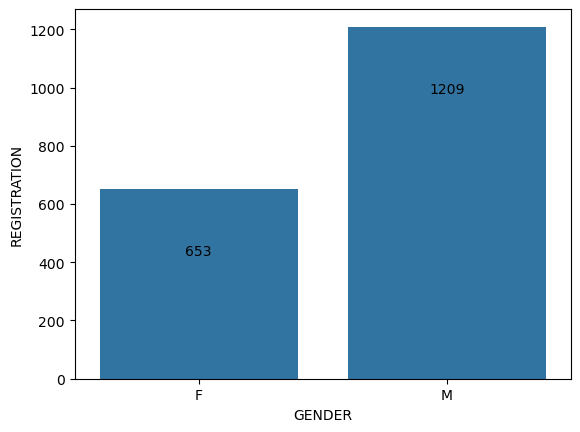

In [54]:
ax = sns.barplot(x='GENDER', y='REGISTRATION', data=raw_data[['REGISTRATION','GENDER']].groupby('GENDER').count().reset_index())
ax.bar_label(ax.containers[0], fontsize=10, padding=-50)